In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Iris.csv')
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
x= df['Species']
y= df.drop(columns=['Species'])

In [9]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors

# Train the model on the scaled training data
knn.fit(y_train_scaled, x_train)

# Make predictions on the scaled test data
y_pred = knn.predict(y_test_scaled)

# Evaluate the model (optional, but recommended)
accuracy = accuracy_score(x_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9833333333333333


In [12]:
# Experiment with different values of K
k_values = range(1, 21) # Test K from 1 to 20
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(y_train_scaled, x_train)
    y_pred = knn.predict(y_test_scaled)
    accuracy = accuracy_score(x_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the best K
best_k_index = accuracy_scores.index(max(accuracy_scores))
best_k = k_values[best_k_index]
best_accuracy = accuracy_scores[best_k_index]

print(f"Accuracy scores for different K values: {accuracy_scores}")
print(f"Best K: {best_k}")
print(f"Best Accuracy: {best_accuracy}")

Accuracy scores for different K values: [0.975, 0.975, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.975, 0.9833333333333333, 0.975, 0.975, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9416666666666667, 0.9083333333333333, 0.925, 0.875, 0.8666666666666667]
Best K: 3
Best Accuracy: 0.9833333333333333


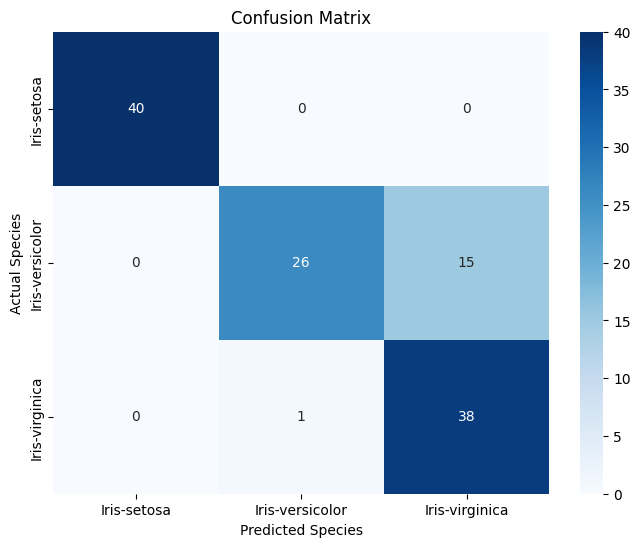

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(x_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix')
plt.show()

# Task
Visualize the decision boundaries of the KNeighborsClassifier model on the 2-component PCA reduced data.

## Dimensionality reduction

### Subtask:
Reduce the dimensionality of the scaled features (`y_train_scaled` and `y_test_scaled`) to 2 components using PCA.


**Reasoning**:
The subtask requires reducing the dimensionality of the scaled features using PCA. This involves importing PCA, instantiating it with 2 components, fitting it to the training data, and then transforming both training and testing data.



In [14]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on the scaled training data and transform
y_train_pca = pca.fit_transform(y_train_scaled)

# Transform the scaled test data
y_test_pca = pca.transform(y_test_scaled)

## Train model on reduced data

### Subtask:
Train a new KNeighborsClassifier model on the 2-component PCA reduced training data.


**Reasoning**:
Train a KNeighborsClassifier model using the PCA-reduced training data and the best K value found earlier.



In [15]:
# Initialize the KNeighborsClassifier with the best K
knn_pca = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the PCA-transformed training data
knn_pca.fit(y_train_pca, x_train)

KNeighborsClassifier(n_neighbors=3)

## Visualize decision boundaries

### Subtask:
Create a scatter plot of the 2-component PCA reduced test data, colored by the actual species. Overlay the decision boundaries of the model trained on the reduced data.


**Reasoning**:
Create a scatter plot of the 2-component PCA reduced test data, colored by the actual species, and overlay the decision boundaries of the model trained on the reduced data.



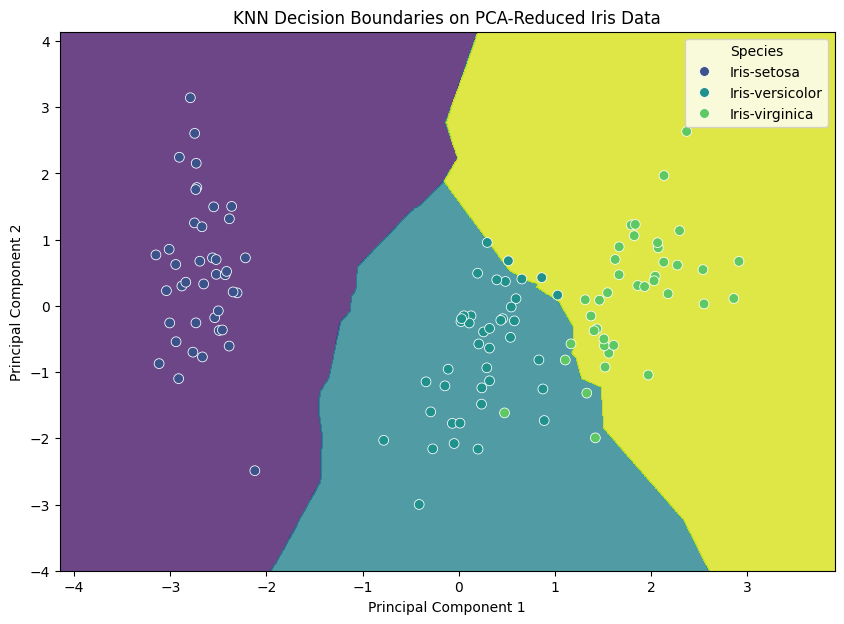

In [17]:
# Create a meshgrid
x_min, x_max = y_test_pca[:, 0].min() - 1, y_test_pca[:, 0].max() + 1
y_min, y_max = y_test_pca[:, 1].min() - 1, y_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict species for each point in the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert string predictions to numerical labels
unique_species = np.unique(x_test)
species_to_int = {species: i for i, species in enumerate(unique_species)}
Z_numeric = np.array([species_to_int[species] for species in Z])

Z_numeric = Z_numeric.reshape(xx.shape)

# Create contour plot for decision boundaries
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z_numeric, alpha=0.8, cmap=plt.cm.viridis)

# Create scatter plot of the test data
sns.scatterplot(x=y_test_pca[:, 0], y=y_test_pca[:, 1], hue=x_test, palette='viridis', s=50)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries on PCA-Reduced Iris Data')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Dimensionality reduction using PCA successfully reduced the scaled training and test data to 2 components.
*   A `KNeighborsClassifier` model was successfully trained on the 2-component PCA-reduced training data, initialized with `n_neighbors=3`.
*   Initially, plotting the decision boundaries failed because the contour function expected numerical data, but the model's predictions were strings.
*   Converting the string species predictions to numerical labels allowed for the successful generation of the decision boundary plot, overlaid on the scatter plot of the PCA-reduced test data.

### Insights or Next Steps

*   Visualizing decision boundaries in a reduced dimension space provides a clear understanding of how the model separates different classes.
*   The visualization confirms that the KNN model creates piecewise linear decision boundaries in the 2-component PCA space.


 **1.How does the KNN algorithm work?**
 KNN is a non-parametric, lazy learning algorithm used for both classification and regression. For classification, it works by finding the 'K' nearest data points (neighbors) to a new, unclassified data point in the feature space. The new data point is then assigned the class that is most common among its K neighbors. The 'distance' between points is typically calculated using metrics like Euclidean distance.

 **2.How do you choose the right K?**
 Choosing the right K is crucial and often involves experimentation. A small K can make the model sensitive to noise and outliers, while a large K can smooth out the decision boundaries and might miss some nuances in the data. Common approaches include:
Cross-validation: Splitting the training data into multiple folds and testing different K values on each fold.
Plotting accuracy vs. K: As we did in the notebook, you can train models with different K values and plot their performance (e.g., accuracy) to see which K yields the best results.
Domain knowledge: Sometimes, understanding the data and the problem can help in choosing an appropriate K.

 **3.Why is normalization important in KNN?**
 Normalization (or scaling) is very important in KNN because it is a distance-based algorithm. Features with larger scales can disproportionately influence the distance calculation, even if they are less important. Normalizing features ensures that all features contribute equally to the distance calculation, preventing features with larger values from dominating the process.

 **4.What is the time complexity of KNN?**
 Training: The training phase of KNN is very fast. It essentially just stores the training data, so the time complexity is O(1) or O(n*d) if you consider storing the data with n samples and d features.
Prediction: The prediction phase is where KNN can be computationally expensive, especially for large datasets. For each new data point, the algorithm needs to calculate the distance to all training points. The time complexity for prediction is O(ndk) where n is the number of training samples, d is the number of features, and k is the number of neighbors. If using a brute-force search for neighbors. However, optimized data structures like K-D trees or ball trees can reduce the average time complexity for neighbor search to O(d log n) or O(d log(n^2)) respectively.

 **5.What are pros and cons of KNN?**
 Pros:
Simple to understand and implement.
No training phase (lazy learner).
Can be used for both classification and regression.
Works well for multi-class problems.
Cons:
Computationally expensive during prediction, especially with large datasets.
Sensitive to noise and outliers (especially with small K).
Requires feature scaling.
Performance can degrade in high-dimensional spaces (curse of dimensionality).

 **6.Is KNN sensitive to noise?**
 Yes, KNN is sensitive to noise, particularly when the value of K is small. A noisy data point can significantly influence the classification of its immediate neighbors. Increasing the value of K can help to mitigate the effect of noise by averaging out the influence of individual noisy points

 **7.How does KNN handle multi-class problems?**
  KNN handles multi-class problems naturally. When predicting the class of a new data point, it identifies the K nearest neighbors and counts the number of neighbors belonging to each class. The new data point is then assigned to the class that has the majority vote among the K neighbors.

 **8.What’s the role of distance metrics in KNN?**
 Distance metrics are fundamental to KNN as they define how the 'similarity' or 'closeness' between data points is measured. The choice of distance metric can significantly impact the performance of the algorithm. The most common distance metric is Euclidean distance, but other metrics like Manhattan distance, Minkowski distance, or Hamming distance can also be used depending on the nature of the data and the problem.